In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

### 1. return

In [22]:
# INSTRUCTION:
# change itv to generate results for 0.125, 0.25 ...
# change algorithm to either td3 or ppo
#----------------------------------------------------

import glob
interval = ["point125","point25","point5","point75"]
itv = interval[3]
algorithm = "td3" # "ppo"
txt_dir = "../SHARCNET/Results/debug/"+algorithm+"/300_300_NN/"+itv+"/"
modes = ["SARA","PLA"]
all_data_files = dict()
for mode in modes:
    mode_data_files = glob.glob(txt_dir+ mode + "/**/" +"*.txt", recursive=True)
    mode_data_files.sort()
    print("{}: {} files found".format(mode,len(mode_data_files)))
    for f in mode_data_files:
        print(f)
    all_data_files[mode]=mode_data_files

SARA: 2 files found
../SHARCNET/Results/debug/td3/300_300_NN/point75/SARA\2019-09-20-030027-0-0\td3\td3_s0\progress.txt
../SHARCNET/Results/debug/td3/300_300_NN/point75/SARA\2019-09-20-030029-1-0\td3\td3_s0\progress.txt
PLA: 2 files found
../SHARCNET/Results/debug/td3/300_300_NN/point75/PLA\2019-09-20-030028-0-0\td3\td3_s0\progress.txt
../SHARCNET/Results/debug/td3/300_300_NN/point75/PLA\2019-09-20-030030-1-0\td3\td3_s0\progress.txt


In [23]:
all_combined_data = dict()
if algorithm == "ppo":
    metrics = ["AverageEpRet", "AverageVVals"]
    col_names = ["return", "V_means"]
else:
    metrics = ["AverageEpRet", "AverageQ1Vals", "AverageQ2Vals"]
    col_names = ["return","Q1_means","Q2_means"]
for mode in modes:

    mode_data = []
    for file in all_data_files[mode]:
        mode_data.append(pd.read_csv(file, sep="\t"))
    
    mode_combined_data = pd.DataFrame()
    for metric, col_name in zip(metrics, col_names):
        metric_combined_data = pd.DataFrame()
        for i in range(len(all_data_files[mode])):
            metric_combined_data[col_name+"_run"+str(i)] = mode_data[i][metric]
        metric_combined_data[col_name+"_avg"] = metric_combined_data.mean(axis=1)
        metric_combined_data[col_name+'_std'] = metric_combined_data.std(axis=1)
        
        mode_combined_data = pd.concat([mode_combined_data,metric_combined_data],axis=1)
    all_combined_data[mode] = mode_combined_data

In [24]:
all_combined_data['SARA']

,return_run0,return_run1,return_avg,return_std,Q1_means_run0,Q1_means_run1,Q1_means_avg,Q1_means_std,Q2_means_run0,Q2_means_run1,Q2_means_avg,Q2_means_std
0,12.910692,12.835297,12.872995,0.037697,0.454853,0.493798,0.474326,0.019472,0.454203,0.494378,0.474291,0.020088
1,18.513325,16.286772,17.400048,1.113276,0.593608,0.587020,0.590314,0.003294,0.594343,0.581067,0.587705,0.006638
2,12.803685,15.731766,14.267726,1.464041,0.589817,0.640071,0.614944,0.025127,0.587456,0.640992,0.614224,0.026768
3,14.145640,14.579181,14.362410,0.216770,0.608723,0.655238,0.631981,0.023258,0.608681,0.658611,0.633646,0.024965
4,12.377074,16.842869,14.609972,2.232897,0.603568,0.720019,0.661793,0.058226,0.604847,0.716538,0.660692,0.055846
5,14.016710,14.908925,14.462817,0.446108,0.626640,0.747859,0.687249,0.060609,0.625011,0.749322,0.687166,0.062156
6,17.459808,15.126487,16.293147,1.166660,0.649611,0.791517,0.720564,0.070953,0.649954,0.788419,0.719187,0.069232
7,15.776299,16.500237,16.138268,0.361969,0.672106,0.852748,0.762427,0.090321,0.672471,0.852923,0.762697,0.090226
8,13.375932,17.781013,15.578473,2.202541,0.701676,0.936262,0.818969,0.117293,0.701733,0.938733,0.820233,0.118500
9,11.214092,16.115286,13.664689,2.450597,0.737961,1.013848,0.875904,0.137943,0.738564,1.010743,0.874653,0.136090


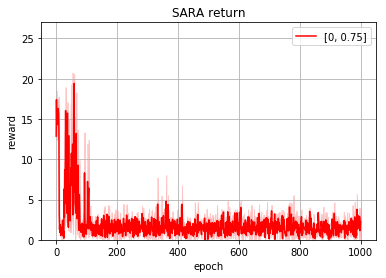

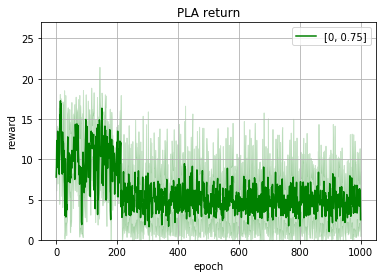

In [25]:
# Plot return
colors = ['r','g','b']
metric = "return"
modes = ["SARA","PLA"]
for mode, c in zip(modes, colors):
    plt.figure()
    plt.grid()
    data = all_combined_data[mode]
    length = data.shape[0]
    label = "[0, "+itv.replace("point","0.")+"]"
    plt.fill_between(data.index, data[metric+"_avg"] - data[metric+"_std"],
                 data[metric+'_avg'] + data[metric+'_std'], alpha=0.2,
                 color=c)
    plt.plot(data.index, data[metric+'_avg'], '-', color=c,
         label=label)
    plt.legend(loc="best")
    plt.ylim([0,27])
    plt.title('{} {}'.format(mode,metric))
    plt.xlabel("epoch")
    plt.ylabel("reward")
    plt.savefig("./plots_for_thesis/debug/"+algorithm+"/300_300_NN/"+"{}_{}_{}.png".format(itv,mode,metric), bbox_inches='tight')


### 2. V_mean

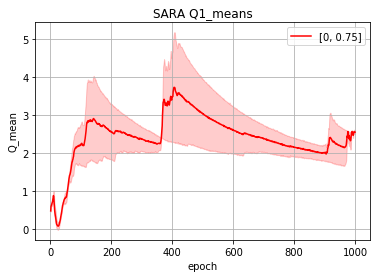

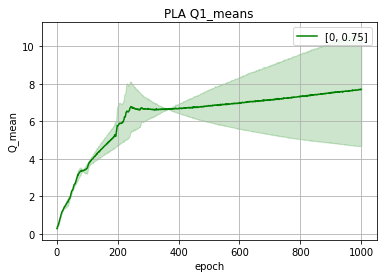

In [27]:
colors = ['r','g','b']
metric = "Q1_means"
modes = ["SARA","PLA"]
for mode, c in zip(modes, colors):
    plt.figure()
    plt.grid()
    data = all_combined_data[mode]
    length = data.shape[0]
    label = "[0, "+itv.replace("point","0.")+"]"
    plt.fill_between(np.linspace(1,1000,length), data[metric+"_avg"] - data[metric+"_std"],
                 data[metric+'_avg'] + data[metric+'_std'], alpha=0.2,
                 color=c)
    plt.plot(np.linspace(1,1000,length), data[metric+'_avg'], '-', color=c,
         label=label)
    plt.legend(loc="best")
#     plt.ylim([0,27])
    plt.title('{} {}'.format(mode,metric))
    plt.xlabel("epoch")
    plt.ylabel("Q_mean")
    plt.savefig('./plots_for_thesis/debug/'+algorithm+'/300_300_NN/{}_{}_{}.png'.format(itv,mode,metric), bbox_inches='tight')
    